In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from tqdm import tqdm

In [2]:
test_state = 0b00000000000010
((test_state ^(test_state >> 1)) >> 4) & 1 

0

In [3]:
def test_bit(state):
    newbit = (state ^(state >> 2) ^ (state >>4) ^(state >> 13))&1
    return newbit
    

In [4]:
print("{:14b}".format((test_bit(5502))))

             0


In [5]:
def transform_bit(state):
    newbit = (state ^(state >> 2) ^ (state >>4) ^(state >> 13)) &1
    state = (state >> 1) | (newbit << 13)
    return state
    

In [6]:
transform_bit(1024)

512

In [7]:
M = 10
N = 500*2**14
state = np.random.randint(2**14, size=M)
states = np.zeros((N, state.shape[0]))
for i in tqdm(range(N)):
    for j in range(M):
        state[j] = transform_bit(state[j])
        states[i,j] = state[j]
#        state2 = transform_bit(state2)
#    states2.append(state2)
#print(len(set(states1)), len(set(states2)))
#states1 = np.array(states1)/(2**14)
#states2 = np.array(states2)/(2**14)
#states2.max(), states2.min()

 24%|█████▌                 | 1974113/8192000 [00:18<00:57, 107493.20it/s]


KeyboardInterrupt: 

In [ ]:
plt.hist(states[:,3])

In [ ]:
print(stats.shapiro(states.sum(axis=1)[::5000]))
plt.hist(states.sum(axis=1), bins=20, )
#plt.hist(states2)

In [15]:
clock_cycle = 10e-2
signal = np.random.randn(10000000)#2*states.sum(axis=1)/(10*2**14)-1
#signal = np.random.rand(1000)

In [16]:
sum_brown = 0
brown_noise = np.zeros((signal.shape[0]))
for i in range(brown_noise.shape[0]):
    sum_brown+=signal[i]
    brown_noise[i] = clock_cycle*sum_brown

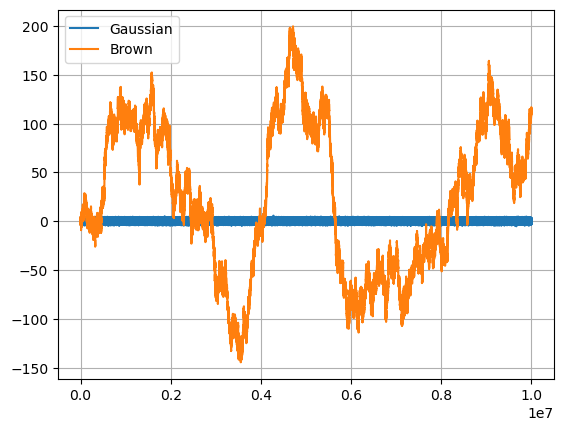

In [18]:
plt.plot(signal)
plt.plot(brown_noise)
plt.grid()
plt.legend(['Gaussian', 'Brown'])
plt.show()

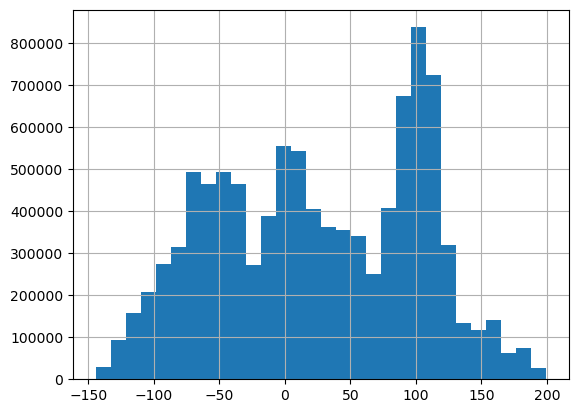

In [25]:
#plt.hist(signal, bins=30)
plt.hist(brown_noise, bins=30)
plt.grid()
#plt.legend(['Gaussian', 'Brown'])
plt.show()

In [41]:
import scipy

f_white, power_white = scipy.signal.periodogram(signal, fs=0.01*1/clock_cycle, window='hamming')
f_brown, power_brown = scipy.signal.periodogram(brown_noise, fs=0.01*1/clock_cycle, window='hamming')

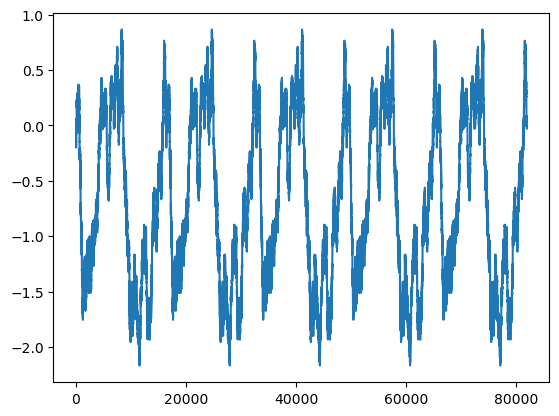

In [44]:
#plt.plot(signal)
plt.plot(brown_noise)

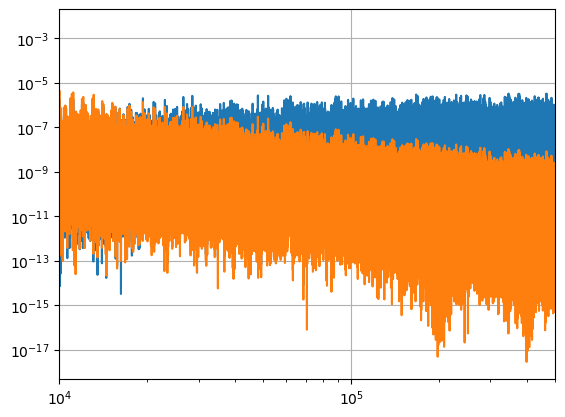

In [197]:
plt.plot(f_white, power_white)
plt.plot(f_brown, 1000000*power_brown)

plt.xlim([1e4, 5*1e5])
plt.grid()
plt.yscale('log')
plt.xscale('log')

(array([  175.,  1630.,  6155., 14711., 21602., 19826., 12065.,  4694.,
          931.,   130.]),
 array([-0.06195679, -0.04921814, -0.03647949, -0.02374084, -0.0110022 ,
         0.00173645,  0.0144751 ,  0.02721375,  0.03995239,  0.05269104,
         0.06542969]),
 <BarContainer object of 10 artists>)

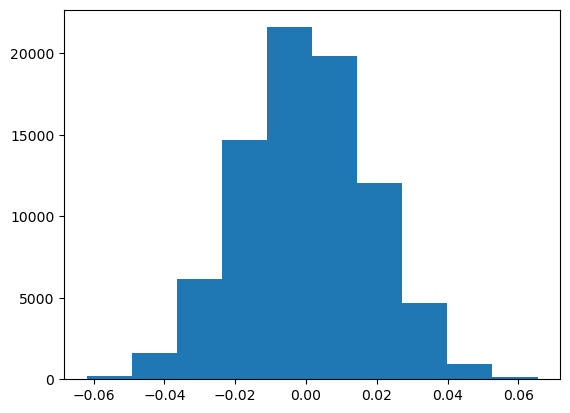

In [46]:
plt.hist(np.diff(brown_noise))



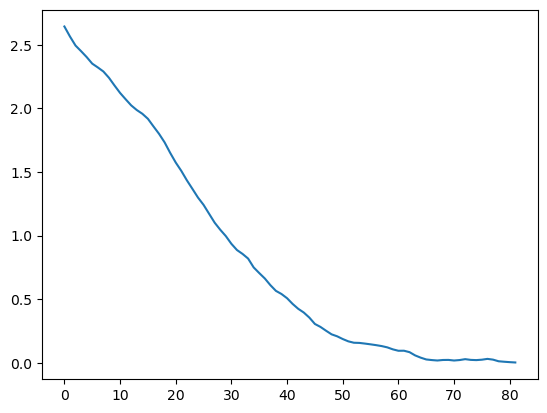

In [187]:
var = brown_noise.std()**2
acorr = np.correlate(brown_noise, brown_noise, 'full')[len(brown_noise)-1:] 
acorr = acorr / var / len(brown_noise)

plt.plot(acorr)

/home/oscar.kremer/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

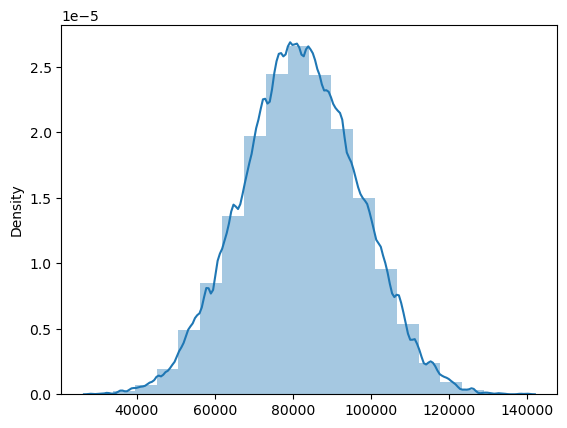

In [180]:
import seaborn as sns
sns.distplot(x=states.sum(axis=1), bins=20)
sns.distplot(x=bro)

In [ ]:
z1 = np.sqrt(-1000*np.log(states1))*np.cos(2*np.pi*states2)
#z1 = sigma*z1
plt.hist(z1, bins=30)
plt.title('{} mean - {} std'.format(np.round(z1.mean(),3), np.round(z1.std(),3)))
plt.show()

In [ ]:
plt.hist(states, bins=16383)
plt.show()

In [4]:
2**14

16384

In [26]:
D = 147e-9
r = D/2
rho = 2200
m = rho*4*np.pi*(np.power(r,3))/3

In [29]:
kb = 1.380648e-23
T = 293
kb*T

4.045298639999999e-21

In [30]:
f = 83e3
omega = 2*np.pi*f

In [31]:
k = omega*omega*m

In [32]:
k

9.951515616125687e-07